In [72]:
import numpy as np
import scipy as sc
import math
from datetime import timedelta, datetime
from operator import attrgetter
import copy_plottrajectoriesfile as cpt
import matplotlib.animation as animation
import imageio #to make .gif out of multiple .png
import matplotlib.pyplot as plt
import scipy.io as sio #to load matlab file
import xarray as xr
from shapely.geometry import Point, Polygon
from astropy.io import ascii
from astropy.table import Table, Column

In [73]:
"""
Load polygons of beaching
"""

boundaries_poly = sio.loadmat('polygons_files/polygons_beaching.mat')

In [105]:
"""
Extract lon lat of polygon n5
"""

lon_poly = boundaries_poly['lon_pol5'][0]
lat_poly = boundaries_poly['lat_pol5'][0]

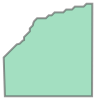

In [106]:
"""
Create polygon from lat/lon
"""

coords_poly = [(lat_poly[i],lon_poly[i]) for i in range(0,len(lon_poly))]
poly = Polygon(coords_poly)
poly

In [107]:
"""
Load particle trajectories output .nc file 
"""

filename = 'nc_trajectory_files/trajectory.nc'
file = xr.open_dataset(filename)

In [108]:
"""
Create Point objects for each timestep for each particle
"""

nb_particles = len(file['lat'])
len_time =[len(file['lat'][i]) for i in range(0,(nb_particles))]

def GetAllTimeCoords(i): #i is the number of the particle
    coords=[]
    for j in range(0,len(file['lat'][i])): #j is the time
        coords.append((file['lat'][i][j],file['lon'][i][j]))
    return coords

coords_particle = []
for i in range(0,nb_particles):
    coords_particle.append(GetAllTimeCoords(i))

p=[[] for i in range(0,nb_particles)]
for i in range(0,nb_particles):
    for j in range(0,len_time[i]):
        p[i].append(Point(coords_particle[i][j]))

In [109]:
"""
Save time, lon, lat and number of the beached particles
"""

particle_beached, time_beached, lat_beached, lon_beached = [], [], [], []

for i in range(0,nb_particles):
    for j in range(0,len_time[i]):
        if p[i][j].within(poly):
            particle_beached.append(i)
            time_beached.append(file['time'][i][j].data)
            lat_beached.append(file['lat'][i][j].data)
            lon_beached.append(file['lon'][i][j].data)

beaching_table = Table([time_beached, particle_beached, lat_beached, lon_beached], names = ('time','particle #','lat','lon'))
ascii.write(beaching_table, 'results_beaching/try_1.csv', format='csv', fast_writer=False, overwrite=True)  

(array([ 30.,  46.,  94., 188., 108., 128.,  63.,  52.,  59.,  56.]),
 array([736697. , 736699.8, 736702.6, 736705.4, 736708.2, 736711. ,
        736713.8, 736716.6, 736719.4, 736722.2, 736725. ]),
 <a list of 10 Patch objects>)

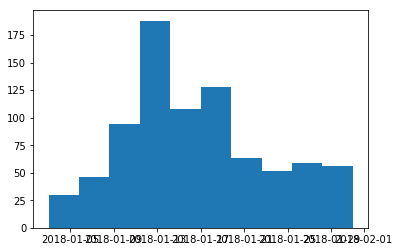

In [111]:
%matplotlib inline
plt.hist(time_beached)

In [112]:
%matplotlib qt
plt.hist(time_beached)

(array([ 30.,  46.,  94., 188., 108., 128.,  63.,  52.,  59.,  56.]),
 array([736697. , 736699.8, 736702.6, 736705.4, 736708.2, 736711. ,
        736713.8, 736716.6, 736719.4, 736722.2, 736725. ]),
 <a list of 10 Patch objects>)